In [ ]:
# Installing required python libraries

!pip install pandas==2.2.3
!pip install numpy==2.1.3
!pip install matplotlib==3.9.2
!pip install seaborn==0.13.2
!pip install scikit-learn==1.5.2
!pip install xgboost==2.1.2

Defaulting to user installation because normal site-packages is not writeable


In [2]:
# Importing python libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
data = pd.read_csv("Datasets/single_oxide_standardised_data.csv")
data.head()

,sample,crystal_system,alpha,beta,gamma,a,b,c,band_gap
0,BeO,Triclinic,-0.001207,0.203736,-0.083961,1.523715,1.744298,-0.125478,4.4843
1,Na2O,Trigonal,0.055514,0.071730,1.342129,-0.716784,-1.015149,-0.325365,1.6260
2,MgO,Triclinic,-0.114648,0.203736,-0.211084,-0.220553,-0.042716,-0.159078,1.9229
3,PbO,Orthorhombic,0.055514,0.071730,-0.044668,0.169879,0.357285,-0.795704,2.1565
4,OF2,Orthorhombic,0.055514,0.071730,-0.044668,0.115727,0.301806,-0.026448,2.1241


In [32]:
# Number of oxides with different crystal systems
data.crystal_system.value_counts()

crystal_system
Triclinic       191
Orthorhombic    178
Monoclinic      165
Trigonal         71
Cubic            68
Tetragonal       60
Hexagonal        36
Name: count, dtype: int64

<Axes: xlabel='crystal_system', ylabel='count'>

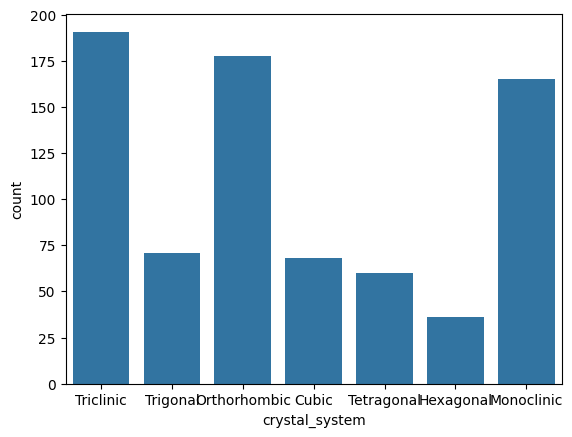

In [4]:
sns.countplot(x=data['crystal_system'])

<Axes: xlabel='crystal_system', ylabel='band_gap'>

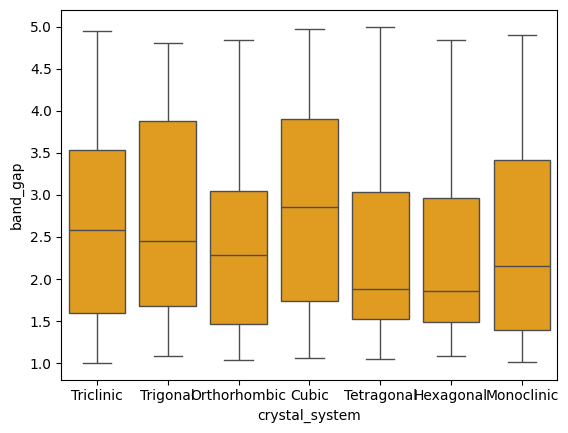

In [5]:
# Trend of band gap with crystal system
sns.boxplot(x=data['crystal_system'],y=data['band_gap'], color='orange')

<Axes: xlabel='crystal_system', ylabel='band_gap'>

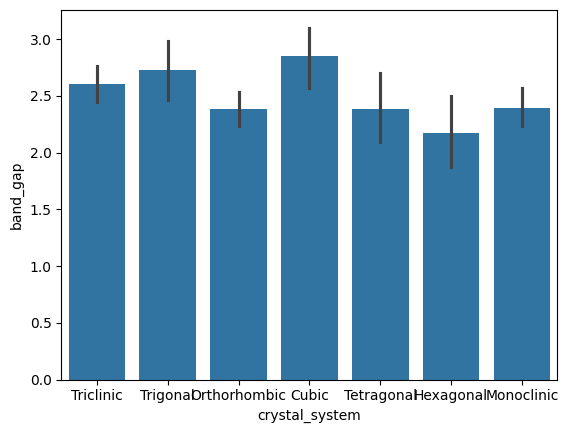

In [6]:
# Trend of band gap with crystal system
sns.barplot(x=data['crystal_system'],y=data['band_gap'])

In [7]:
# Encoding Crystal Systems
custom_labeling={
    'Triclinic':0,
    'Monoclinic':1,
    'Orthorhombic':2,
    'Tetragonal':3,
    'Hexagonal':4,
    'Trigonal':5,
    'Cubic':6
}

encoded_labels = []
for index, row in data.iterrows():
    label = row['crystal_system']
    encoded_label = custom_labeling[label]
    encoded_labels.append(encoded_label)

data['encoded_crystal_system'] = encoded_labels

In [37]:
data.head()

,sample,crystal_system,alpha,beta,gamma,a,b,c,band_gap,encoded_crystal_system
0,BeO,Triclinic,-0.001207,0.203736,-0.083961,1.523715,1.744298,-0.125478,4.4843,0
1,Na2O,Trigonal,0.055514,0.071730,1.342129,-0.716784,-1.015149,-0.325365,1.6260,5
2,MgO,Triclinic,-0.114648,0.203736,-0.211084,-0.220553,-0.042716,-0.159078,1.9229,0
3,PbO,Orthorhombic,0.055514,0.071730,-0.044668,0.169879,0.357285,-0.795704,2.1565,2
4,OF2,Orthorhombic,0.055514,0.071730,-0.044668,0.115727,0.301806,-0.026448,2.1241,2


In [8]:
df = data.drop(['sample', 'crystal_system'], axis=1)

In [39]:
df.head()

,alpha,beta,gamma,a,b,c,band_gap,encoded_crystal_system
0,-0.001207,0.203736,-0.083961,1.523715,1.744298,-0.125478,4.4843,0
1,0.055514,0.071730,1.342129,-0.716784,-1.015149,-0.325365,1.6260,5
2,-0.114648,0.203736,-0.211084,-0.220553,-0.042716,-0.159078,1.9229,0
3,0.055514,0.071730,-0.044668,0.169879,0.357285,-0.795704,2.1565,2
4,0.055514,0.071730,-0.044668,0.115727,0.301806,-0.026448,2.1241,2


In [31]:
# Correlation Matrix
matrix = df.corr()
matrix

,alpha,beta,gamma,a,b,c,band_gap,encoded_crystal_system
alpha,1.000000,0.753223,0.374394,0.083832,0.091949,-0.023047,0.085522,-0.069466
beta,0.753223,1.000000,0.367237,0.015714,0.042658,-0.016100,0.018406,-0.130164
gamma,0.374394,0.367237,1.000000,0.039723,-0.001578,0.047321,0.051440,0.111131
a,0.083832,0.015714,0.039723,1.000000,0.958757,0.117778,0.898533,0.068313
b,0.091949,0.042658,-0.001578,0.958757,1.000000,0.105676,0.857772,-0.176173
c,-0.023047,-0.016100,0.047321,0.117778,0.105676,1.000000,0.120754,-0.004484
band_gap,0.085522,0.018406,0.051440,0.898533,0.857772,0.120754,1.000000,0.054569
encoded_crystal_system,-0.069466,-0.130164,0.111131,0.068313,-0.176173,-0.004484,0.054569,1.000000


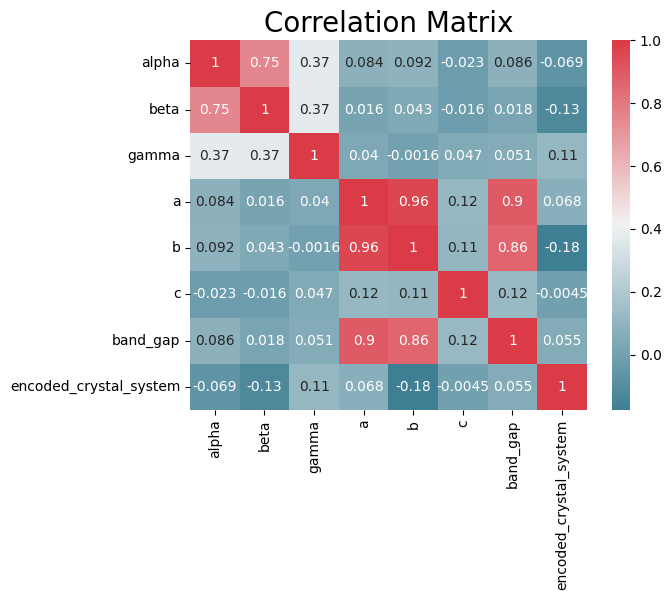

In [10]:
# Correlation Chart
corr = df.corr()
sns.heatmap(corr, annot=True, cmap=sns.diverging_palette(220, 10, as_cmap=True))
plt.title("Correlation Matrix", fontsize=20)
plt.show()

In [32]:
abs(matrix['band_gap'])

alpha                     0.085522
beta                      0.018406
gamma                     0.051440
a                         0.898533
b                         0.857772
c                         0.120754
band_gap                  1.000000
encoded_crystal_system    0.054569
Name: band_gap, dtype: float64

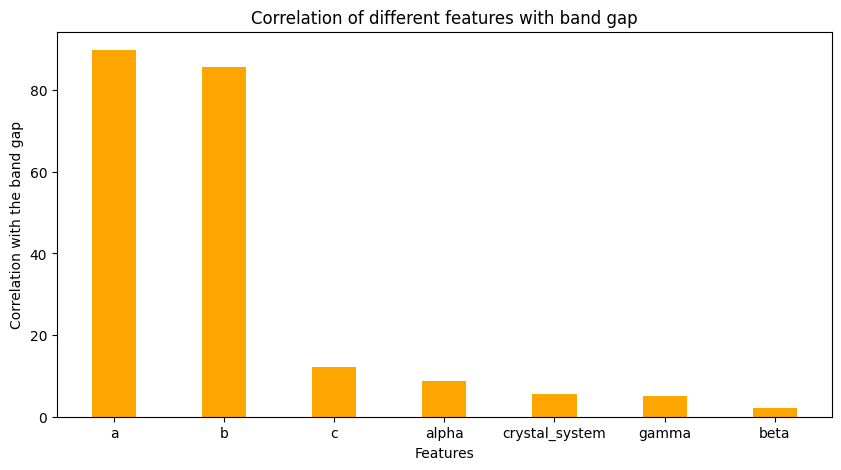

In [13]:
fig = plt.figure(figsize = (10, 5))

param = ['a', 'b', 'c', 'alpha', 'crystal_system', 'gamma', 'beta']
correlation = [89.85, 85.78, 12.07, 8.6, 5.5, 5, 2]
plt.bar(param, correlation, color ='orange', width = 0.4)

plt.xlabel("Features")
plt.ylabel("Correlation with the band gap")
plt.title("Correlation of different features with band gap")
plt.show()

In [14]:
X = df.drop(['band_gap'], axis=1)
y = df['band_gap']

In [15]:
# Dividing data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
from sklearn.metrics import mean_squared_error, r2_score

In [17]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
lr_model = LinearRegression()

# Train the model on the training data
lr_model.fit(X_train, y_train)

# Make predictions on the test data
lr_y_pred = lr_model.predict(X_test)

# Evaluate the model performance
lr_mse = mean_squared_error(y_test, lr_y_pred)
lr_r2 = r2_score(y_test, lr_y_pred)

print(f"Mean Squared Error: {lr_mse:.4f}")
print(f"R-squared (R2) Score: {lr_r2:.4f}")

Mean Squared Error: 0.2217
R-squared (R2) Score: 0.8231


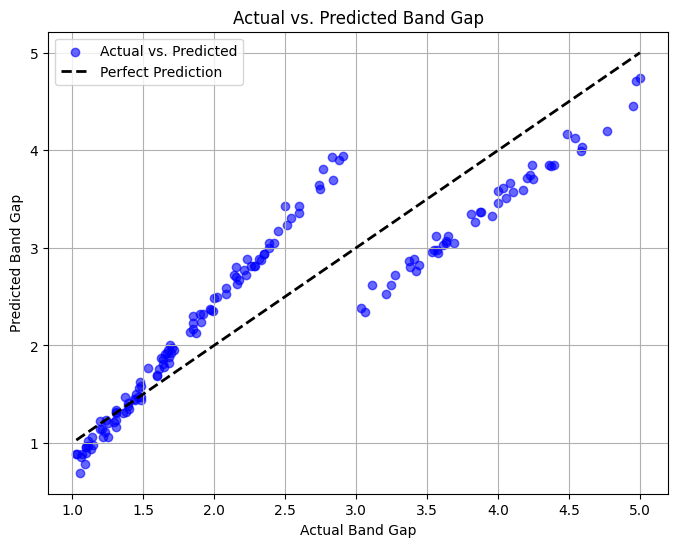

In [18]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, lr_y_pred, color='b', alpha=0.6, label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Band Gap')
plt.ylabel('Predicted Band Gap')
plt.title('Actual vs. Predicted Band Gap')
plt.legend()
plt.grid(True)
plt.show()

In [22]:
import xgboost as xgb

# Initialise the model
dtrain_reg = xgb.DMatrix(X_train, y_train, enable_categorical=True)
dtest_reg = xgb.DMatrix(X_test, y_test, enable_categorical=True)
params = {"objective": "reg:squarederror", "tree_method": "hist"}
n = 100

# Train the model on the training data
xg_model = xgb.train(params=params, dtrain=dtrain_reg, num_boost_round=n)

# Make predictions on the test data
xg_y_pred = xg_model.predict(dtest_reg)

# Evaluate the model
xg_mse = mean_squared_error(y_test, xg_y_pred)
xg_r2 = r2_score(y_test, xg_y_pred)

print(f"Mean Squared Error: {xg_mse:.4f}")
print(f"R-squared (R2) Score: {xg_r2:.4f}")

Mean Squared Error: 0.2381
R-squared (R2) Score: 0.8100


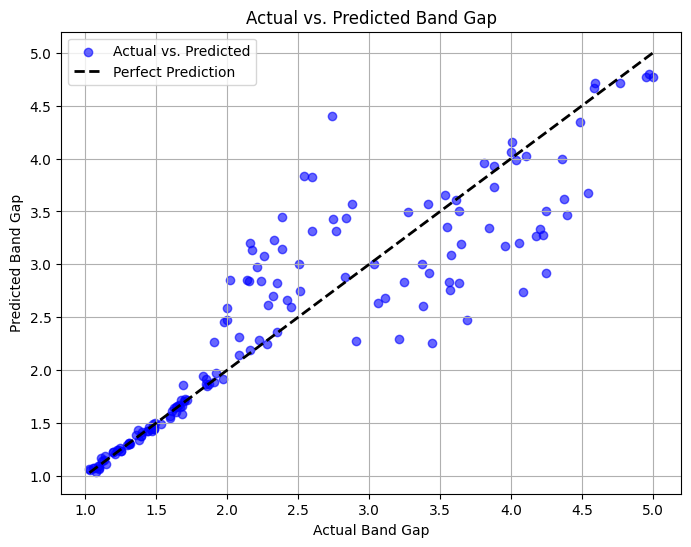

In [23]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, xg_y_pred, color='b', alpha=0.6, label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Band Gap')
plt.ylabel('Predicted Band Gap')
plt.title('Actual vs. Predicted Band Gap')
plt.legend()
plt.grid(True)
plt.show()

In [24]:
from sklearn.tree import DecisionTreeRegressor 

# Initialise the model
dt_model = DecisionTreeRegressor(random_state = 0)

# Train the model on the training data
dt_model.fit(X_train, y_train)

# Make predictions on the test data
dt_y_pred = dt_model.predict(X_test)

# Evaluate the model
dt_mse = mean_squared_error(y_test, dt_y_pred)
dt_r2 = dt_model.score(X_test, y_test)

print(f"Mean Squared Error: {dt_mse:.4f}")
print(f"R-squared (R2) Score: {dt_r2:.4f}")

Mean Squared Error: 0.3319
R-squared (R2) Score: 0.7351


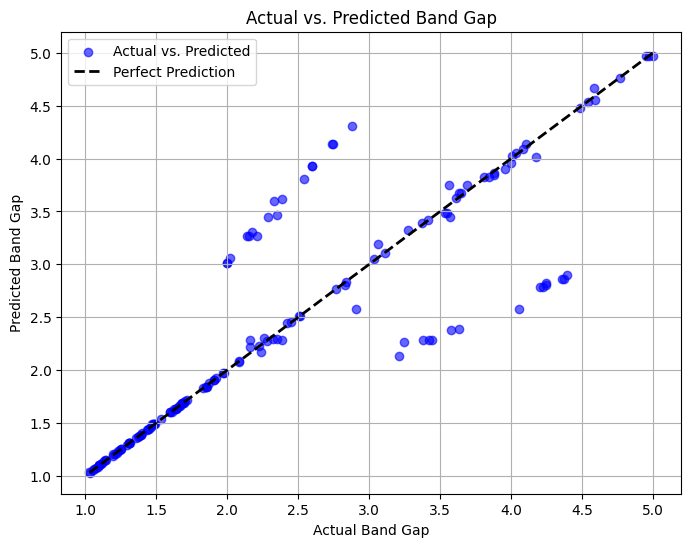

In [25]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, dt_y_pred, color='b', alpha=0.6, label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Band Gap')
plt.ylabel('Predicted Band Gap')
plt.title('Actual vs. Predicted Band Gap')
plt.legend()
plt.grid(True)
plt.show()

In [19]:
from sklearn.ensemble import RandomForestRegressor

# Initialise the model
rf_model = RandomForestRegressor(random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
rf_y_pred = rf_model.predict(X_test)

# Evaluate the model
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = rf_model.score(X_test, y_test)

print(f"Mean Squared Error: {rf_mse:.4f}")
print(f"R-squared (R2) Score: {rf_r2:.4f}")

Mean Squared Error: 0.1860
R-squared (R2) Score: 0.8516


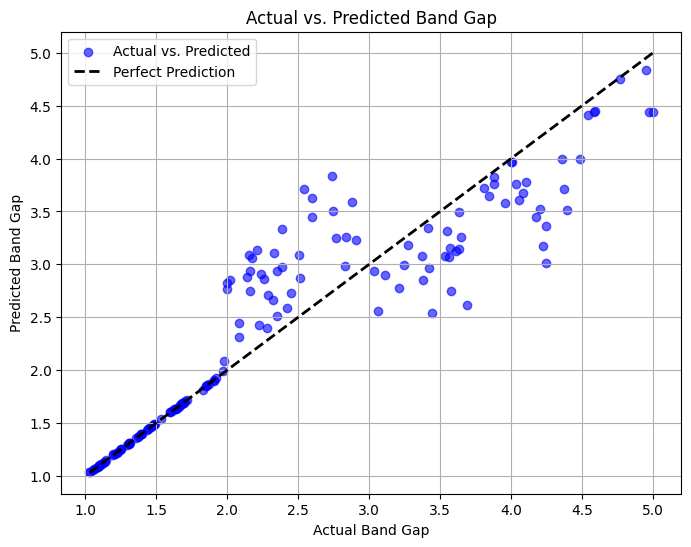

In [20]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, rf_y_pred, color='b', alpha=0.6, label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Band Gap')
plt.ylabel('Predicted Band Gap')
plt.title('Actual vs. Predicted Band Gap')
plt.legend()
plt.grid(True)
plt.show()

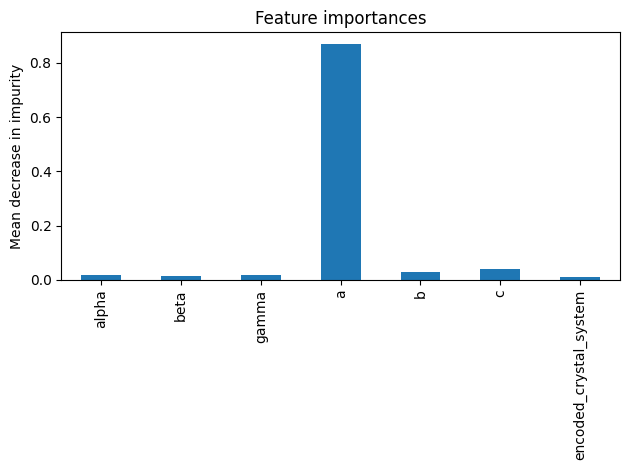

In [ ]:
feature_names = X.columns
importances = rf_model.feature_importances_
feature_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
feature_importances.plot.bar(ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()